<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [16]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
norm_fn = '/local/S.Rasp/preprocessed_data/fbp_engy_ess_ref_train_sample1_norm.nc'

In [4]:
norm = xr.open_dataset(norm_fn)

In [5]:
norm

<xarray.Dataset>
Dimensions:              (feature_lev: 94, target_lev: 65)
Coordinates:
  * feature_lev          (feature_lev) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 ...
  * target_lev           (target_lev) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 ...
Data variables:
    feature_means        (feature_lev) float32 ...
    feature_stds         (feature_lev) float32 ...
    feature_mins         (feature_lev) float32 ...
    feature_maxs         (feature_lev) float32 ...
    target_means         (target_lev) float32 ...
    target_stds          (target_lev) float32 ...
    target_mins          (target_lev) float32 ...
    target_maxs          (target_lev) float32 ...
    feature_names        (feature_lev) object ...
    target_names         (target_lev) object ...
    feature_stds_by_var  (feature_lev) float32 ...
    target_conv          (target_lev) float32 ...
Attributes:
    log:      \n    Time: 2018-05-06T14:01:56\n\n    Executed command:\n\n   ...

In [6]:
norm['target_conv']

<xarray.DataArray 'target_conv' (target_lev: 65)>
array([ 1.00464e+03,  1.00464e+03,  1.00464e+03,  1.00464e+03,  1.00464e+03,
        1.00464e+03,  1.00464e+03,  1.00464e+03,  1.00464e+03,  1.00464e+03,
        1.00464e+03,  1.00464e+03,  1.00464e+03,  1.00464e+03,  1.00464e+03,
        1.00464e+03,  1.00464e+03,  1.00464e+03,  1.00464e+03,  1.00464e+03,
        1.00464e+03,  1.00464e+03,  1.00464e+03,  1.00464e+03,  1.00464e+03,
        1.00464e+03,  1.00464e+03,  1.00464e+03,  1.00464e+03,  1.00464e+03,
        2.83470e+06,  2.83470e+06,  2.83470e+06,  2.83470e+06,  2.83470e+06,
        2.83470e+06,  2.83470e+06,  2.83470e+06,  2.83470e+06,  2.83470e+06,
        2.83470e+06,  2.83470e+06,  2.83470e+06,  2.83470e+06,  2.83470e+06,
        2.83470e+06,  2.83470e+06,  2.83470e+06,  2.83470e+06,  2.83470e+06,
        2.83470e+06,  2.83470e+06,  2.83470e+06,  2.83470e+06,  2.83470e+06,
        2.83470e+06,  2.83470e+06,  2.83470e+06,  2.83470e+06,  2.83470e+06,
        1.00000e-03, -1.00

In [8]:
norm['target_stds']

<xarray.DataArray 'target_stds' (target_lev: 65)>
array([4.222092e-05, 3.054340e-05, 3.381253e-05, 2.451552e-05, 8.957083e-06,
       6.645331e-06, 6.468793e-06, 9.915496e-06, 1.091423e-05, 1.223686e-05,
       1.381294e-05, 1.731757e-05, 2.093899e-05, 2.516005e-05, 3.427438e-05,
       4.587084e-05, 5.748007e-05, 6.356157e-05, 6.572238e-05, 6.707018e-05,
       6.800402e-05, 7.491145e-05, 7.994581e-05, 8.300694e-05, 7.386160e-05,
       6.395006e-05, 5.364083e-05, 4.733973e-05, 4.832533e-05, 6.347254e-05,
       0.000000e+00, 0.000000e+00, 1.491135e-12, 8.110661e-13, 3.404944e-13,
       3.700434e-12, 2.671416e-12, 4.489682e-12, 1.811464e-11, 6.524220e-11,
       2.124115e-10, 6.330181e-10, 1.734122e-09, 4.202714e-09, 8.210532e-09,
       1.293397e-08, 1.820800e-08, 2.181663e-08, 2.481340e-08, 2.913694e-08,
       3.655530e-08, 4.871007e-08, 6.128263e-08, 7.587361e-08, 7.839297e-08,
       7.974870e-08, 7.604952e-08, 6.805428e-08, 6.973346e-08, 9.301567e-08,
       3.257105e+02, 2.506

In [9]:
tmp = norm['target_conv'] * norm['target_stds']

<BarContainer object of 65 artists>

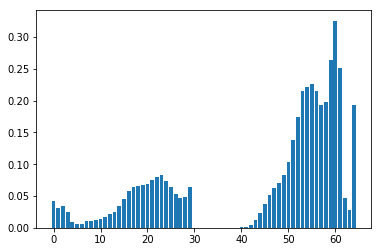

In [17]:
plt.bar(range(65), np.abs(tmp))

In [19]:
norm['target_conv'][-5:-1] *= 1e3

In [21]:
norm['target_conv'][-1] *= 2e-2

<BarContainer object of 65 artists>

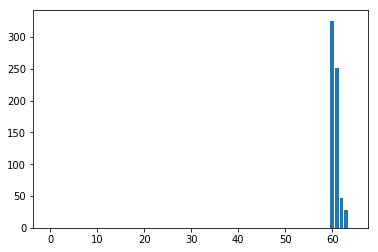

In [22]:
plt.bar(range(65), np.abs(norm['target_conv'] * norm['target_stds']))

In [23]:
norm.to_netcdf('/local/S.Rasp/preprocessed_data/fbp_engy_ess_ref_train_sample1_norm_big_fluxes.nc')

In [24]:
norm.close()